# Integrated Project


## Video Games Analysis 

#### Objective: To identify patterns that determine whether a game succeeds or not

## Data Description

> - Name
> - Platform
> - Year_of_Release
> - Genre
> - NA_sales (North American sales in USD million)
> - EU_sales (sales in Europe in USD million)
> - JP_sales (sales in Japan in USD million)
> - Other_sales (sales in other countries in USD million)
> - Critic_Score (maximum of 100)
> - User_Score (maximum of 10)
> - Rating (ESRB)
Data for 2016 may be incomplete.

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import scipy
from scipy import stats as st

In [2]:
from io import BytesIO
import requests
spreadsheet_id = '16GOlneHbTy3hFgu2U2niXLS6IeBNUYEmaklcZRoPOLs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
games_df = pd.read_csv(BytesIO(r.content))



In [3]:
display(games_df)
display(games_df.describe())
display(games_df.sample())
display(games_df.head())
display(games_df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1321,Namco Museum 64,N64,1999.0,Misc,1.24,0.17,0.03,0.01,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
def number_of_nulls(df):
    null_values = games_df.isnull().sum()
    percentage_of_null_values = games_df.isnull().sum() / len(games_df) *100
    null_values_table = pd.concat([null_values, percentage_of_null_values], axis = 1)\
                        .rename(columns = {0 : 'Null Values', 1 : 'Percentage of Null Values'}).round(2)
    return null_values_table

number_of_nulls(games_df)

,Null Values,Percentage of Null Values
Name,2,0.01
Platform,0,0.00
Year_of_Release,269,1.61
Genre,2,0.01
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00
Other_sales,0,0.00
Critic_Score,8578,51.32
User_Score,6701,40.09


> - First look, there are a lot of missing values in **<em>Name</em>**,**<em>Year_of_Release</em>**,**<em>Critic_Score</em>**,**<em>Genre</em>**, **<em>User_AScore</em>** and **<em>Rating<em>** column
> - We need to change the datatypes for **<em>Year_of_Release</em>**,**<em>Critic_Score</em>** and **<em>User_Score</em>**
> - I also noticed there's 'tbd' under User_score column. We also need to address that

## Step 2. Prepare the data

### Replace column names

In [5]:
games_df.columns= games_df.columns.str.lower()
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Missing Values

In [6]:
games_df.loc[games_df['name'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
#Dropping the missing values on name and genre column
games_df.dropna(subset=['name','genre'], inplace=True)



> I decided to drop the missing values from the **<em>name</em>** and **<em>genre</em>** columns as it was only 1% percent of the data and would not affect the analysis

In [8]:
games_df.loc[games_df['year_of_release'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
games_df.loc[games_df['name']== 'Madden NFL 2004']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [10]:
games_df['year_of_release']= games_df.groupby(['name'])['year_of_release'].apply(lambda x: x.fillna(x.ffill().bfill()))

In [11]:

games_df['year_of_release'].isnull().sum()

146

In [12]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df['year_of_release'].median())

> - As with the missing values from year_of_release column. There's 269 of them. Gaming company usually release their games the same year for all platforms. As the year_of_release is present in other platform, I'm going to fill it in with the year from the other platforms
> - I used ffill and ffill to populate the empty cells with the corresponding value in the next row or previous row.
> - I filled the rest of the missing values with the median

In [13]:
#replacing tbd with nan 
games_df['user_score']= games_df['user_score'].replace('tbd', np.nan)

#Filling in the rating with the most common rating based on genre
games_df['rating'] = games_df.groupby('genre')['rating'].apply(lambda x: x.fillna(x.mode().iloc[0]))

#Filling in missing values in critic_score
games_df['critic_score']= games_df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))





In [14]:
#filling in missing values in user_score and critic_score with median
games_df['user_score']= games_df['user_score'].fillna(games_df['user_score'].median())

games_df['critic_score'] = games_df['critic_score'].fillna(games_df['critic_score'].median())

In [15]:
number_of_nulls(games_df)

,Null Values,Percentage of Null Values
name,0,0.0
platform,0,0.0
year_of_release,0,0.0
genre,0,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0
other_sales,0,0.0
critic_score,0,0.0
user_score,0,0.0


> - I decided to replace the **<em>tbd</em>** value in the user score column with nan because we can't really use that for analysis
> - Then I filled in the **<em>user_score</em>** with median to not skew the analysis
> - I used mode to fill in the missing values for the **<em>rating</em>** column based on the most common rating for that genre. Usually games with similar genre have similar or at least close to similar rating that's why I chose the mode to get the most common rating
> - Then I decided to fill in the missing values for **<em>critic_score</em>** using the average score based on the title. It is a reasonable way to fill in the missing values because there are already a established score from critics and we're going to take the average of that
> - I decided to fill in the remaining missing values in ***critic_score*** with median to not skew the data much
> - I also decided to fill in the remaining missing values in **<em>user_score</em>** with the median to also not skew the analysis
> - These missing values occured because the way the data was imported or in the ***critic score*** and ***user score*** case, it might be because these games were not reviewed at all

### Datatype conversion

In [16]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)
games_df['critic_score'] = games_df['critic_score'].astype(int)
games_df['user_score'] = games_df['user_score'].astype(float)

In [17]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


> Now we can see everything is in its right data type 

###  Calculate total sales

In [18]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,T,31.38


### Checking for duplicates

In [19]:
games_df.duplicated().sum()

0

### Conclusion

> - Prepared the data by converting the column names to lower case
> - Dropped missing values in the name and genre column because it was only 2 and would not affect the analysis
> - Filled in missing values in the year_of_release, user_score and rating column
> - Decided to fill in the remaining missing values in critic_score with the median 
> - Changed <em>tbd</em> values to nan values
> - Replaced datatypes to their appropriate types
> - Calculated the total sales in all region
> - Checked for duplicates and there are no duplicates



## Step 3. Analyze the data

#### Games released per year

<Figure size 1872x576 with 0 Axes>

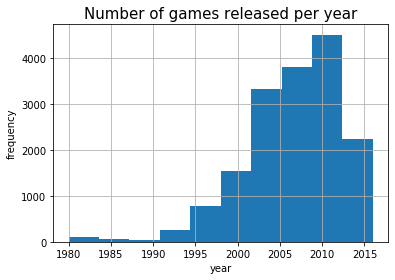

In [20]:
plt.figure(figsize = (26,8))
games_df.hist('year_of_release')
plt.title('Number of games released per year', fontsize=15)
plt.xlabel('year')
plt.ylabel('frequency')
plt.show()

> There was not a lot of games prior to 1995, so these data are not significant. However, the 2000s had a sudden surge of game releases especially around 2007-2012. 

#### Platform Sales

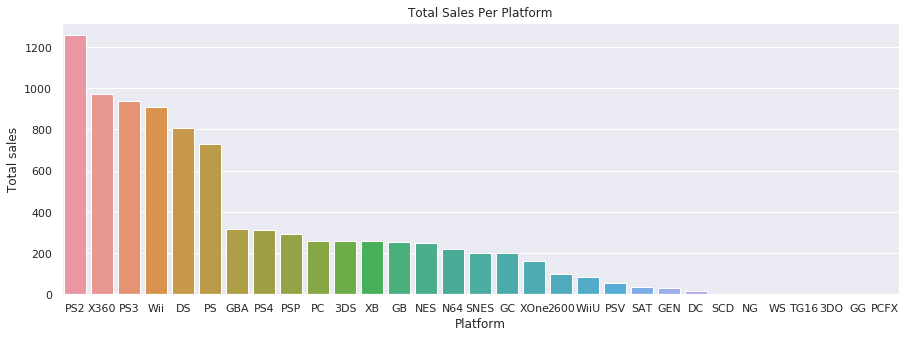

In [21]:
sales_platform = games_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize = (15,5))
sns.set(style='darkgrid')
sns.color_palette()
sns.barplot(x=sales_platform.index ,y=sales_platform['total_sales']).set_title('Total Sales Per Platform')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.show()

> The graph shows the platform with number of total sales. There's 6 that stand out: **_PS2, X360, PS3, Wii, DS, PS_**

In [22]:
sales_platform.head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


#### Top Platforms Sales Per Year

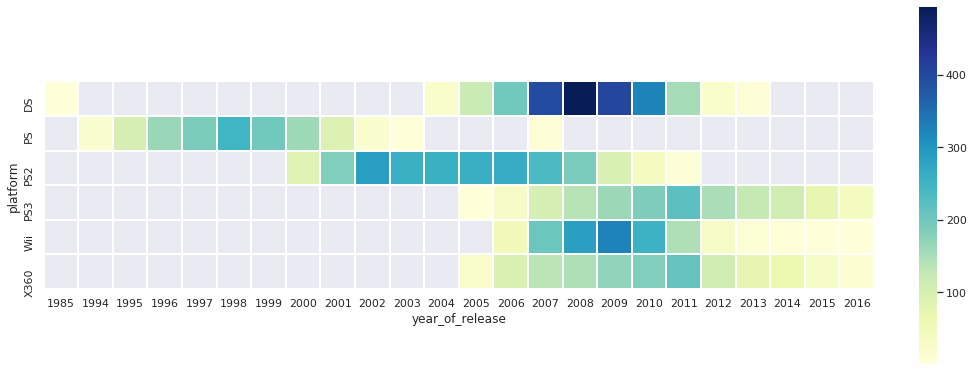

In [23]:
platform_year = games_df[games_df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])]\
                .groupby(["platform","year_of_release"]).size().unstack()

sns.set(style='darkgrid')
plt.figure(figsize=(16,7))
sns.heatmap(platform_year, square=True,cbar_kws={'fraction' : 0.02},cmap='YlGnBu',linewidth=1)
plt.show()

> - 'X360', 'PS3' and 'Wii' are the only one that till had sales out of the top 5 platform. Very low volume from year 2012 to 2016
> - Wii was popular between 2006 and 2011. It's popularity has reduced since it now have zero sales.
> - DS was popular between 2005 and 2010
> - X360 was on the height of popularity between 2008 and 2011
> - PS3 was popular between 2008 and 2013. Sales dropped sharply in 2016
> - PS2 was popular between 2001 and 2007. Sales started dropping after 2008 which is when PS3 started getting popular. 
> - With the release of PS3, PS2 sales decreased as the consumers started to upgarde their consoles
> - The other 3 platforms PS2, PS,DS used to be very popular but in 2016 recorded zero sales.
> - It takes around 7 years for new platforms to appear and old ones to fade
> - To build a prognosis for 2017, we need to identify platforms that are still popular in 2016.
> - It takes about 5 to 6 years for a console to reach peak of popularity from the beginnning. We will take the data for the past 6 years to build a prognosis for 2017

#### Top platform based on sales

In [24]:
# getting the data from 2011 to 2016
new_df = games_df[games_df['year_of_release'] >= 2011]


> I picked data from 2011 to 2016 because 5 years is usually how long the company takes to release a newer console and also how long a console takes to reach peak popularity

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4052 entries, 16 to 16714
Data columns (total 12 columns):
name               4052 non-null object
platform           4052 non-null object
year_of_release    4052 non-null int64
genre              4052 non-null object
na_sales           4052 non-null float64
eu_sales           4052 non-null float64
jp_sales           4052 non-null float64
other_sales        4052 non-null float64
critic_score       4052 non-null int64
user_score         4052 non-null float64
rating             4052 non-null object
total_sales        4052 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 411.5+ KB


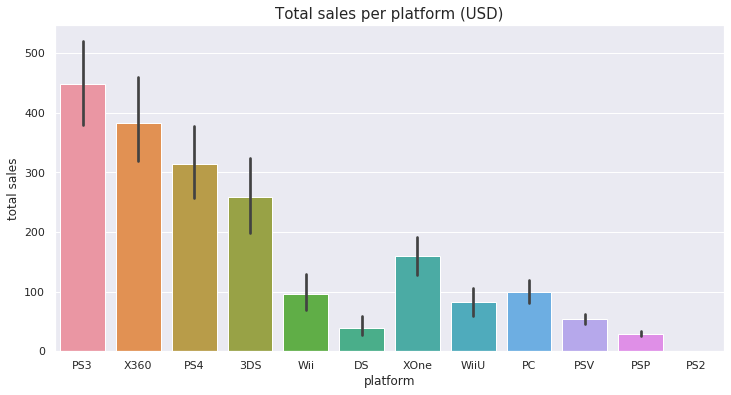

In [26]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.barplot(x='platform', y='total_sales',estimator=sum, data=new_df)
plt.title('Total sales per platform (USD)',fontsize=15)
plt.ylabel('total sales')
plt.show()

> - As we can see from the graph, ***PS3, X360, PS4, 3DS, XOne*** are the top 5 leading in sales
> - ***PS3*** is the leading console but of course the company are going to release more games for PS4 and XOne, which will change the sales as the company tries to boost the sales for newer consoles.
> - We can expect that games for PS3 and X360 at the year 2017 will continue to drop since is it not profitable.

#### Boxplot for global sale of all games by platform

> I will only select the top 5 platforms

In [27]:
top_sales= new_df[new_df['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]

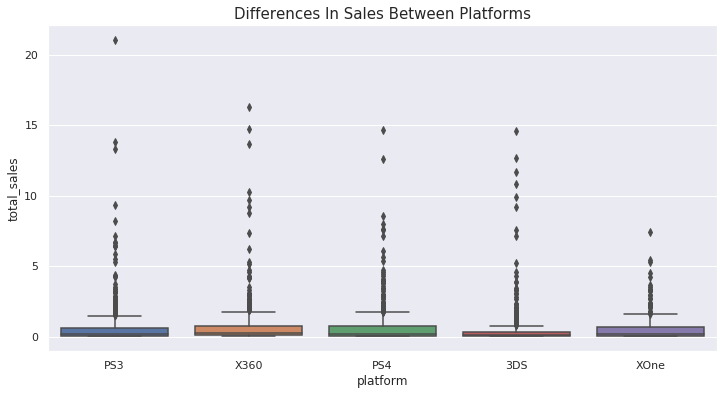

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'platform', y='total_sales', data=top_sales)
plt.suptitle('')
plt.title('Differences In Sales Between Platforms',fontsize=15)
plt.show()



> There's no significant difference in sales and the boxplots look similar. PS3 had slightly higher sales but nothing significant




In [29]:
top_sales.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'median'])

,mean,median
,total_sales,total_sales
platform,,
3DS,0.503333,0.120
PS3,0.627896,0.210
PS4,0.801378,0.200
X360,0.756423,0.265
XOne,0.645020,0.220


> As we can see the mean is much higher than median which shows the positive distribution in the graph

#### Correlation between reviews and sales

In [30]:
new_df[new_df.platform == 'PS4'][['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.499067,0.335171
user_score,0.499067,1.000000,-0.062756
total_sales,0.335171,-0.062756,1.000000


In [31]:
ps4= new_df[new_df['platform']=='PS4']


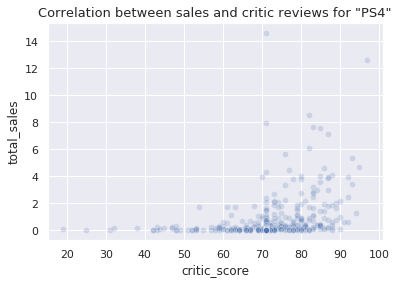

In [32]:
sns.scatterplot(x= 'critic_score', y= 'total_sales',data=ps4, alpha=.20)
plt.title('Correlation between sales and critic reviews for "PS4"',fontsize=13);

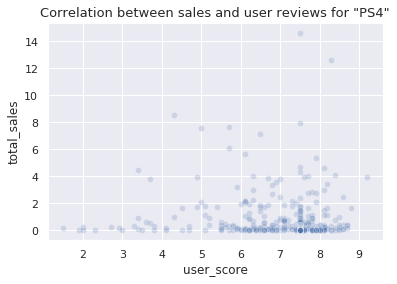

In [33]:
sns.scatterplot(x= 'user_score', y= 'total_sales',data=ps4, alpha=.20)
plt.title('Correlation between sales and user reviews for "PS4"',fontsize=13);

 > - Based on the graph above, there's weak  correlation between sales and critic reviews since it's only ***.33***.
 > - There is almost no connection between user reviews and total sales

#### Comparison of games on other platforms

In [34]:
top_sales.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum')\
        .sort_values(by='total_sales', ascending=False)

total_sales
name                                              platform             
Grand Theft Auto V                                PS3             21.05
                                                  X360            16.27
Call of Duty: Modern Warfare 3                    X360            14.73
Call of Duty: Black Ops 3                         PS4             14.63
Pokemon X/Pokemon Y                               3DS             14.60
...                                                                 ...
Resistance Dual Pack                              PS3              0.01
Naruto Shippuden: Ultimate Ninja Storm Collection PS3              0.01
Dead Rising                                       XOne             0.01
Dead Rising 2                                     XOne             0.01
Turbo: Super Stunt Squad                          PS3              0.01

[2370 rows x 1 columns]

In [35]:
top_games = (top_sales.pivot_table(index='name', values='total_sales', aggfunc='sum')\
             .sort_values('total_sales', ascending=False)).head(10)

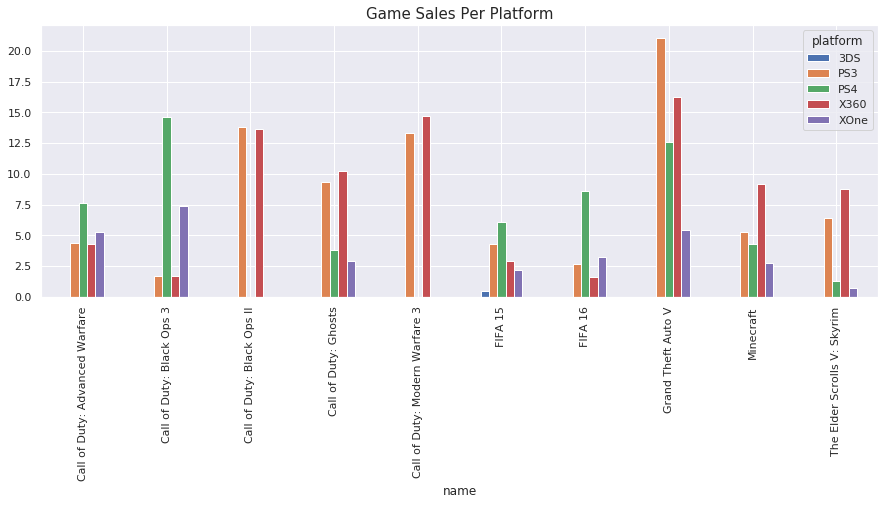

In [36]:
pd.pivot_table(top_sales[top_sales["name"].isin(top_games.index)],\
            values = 'total_sales', index = 'name',columns = 'platform',aggfunc ='sum')\
            .plot(kind='bar', figsize=(15,5))
plt.title('Game Sales Per Platform', fontsize = 15)
plt.show()





> Based on the graph above, we can see that Playstation platform had slightly more sales on certain games than Xbox platform.

#### Distribution of games by genre

In [37]:
game_genre = new_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
            .sort_values(by='total_sales', ascending=False)
game_genre = game_genre.reset_index().rename_axis(None, axis=1)
game_genre

,genre,total_sales
0,Action,565.22
1,Shooter,402.96
2,Role-Playing,245.63
3,Sports,237.40
4,Misc,139.91
5,Platform,88.68
6,Racing,88.31
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


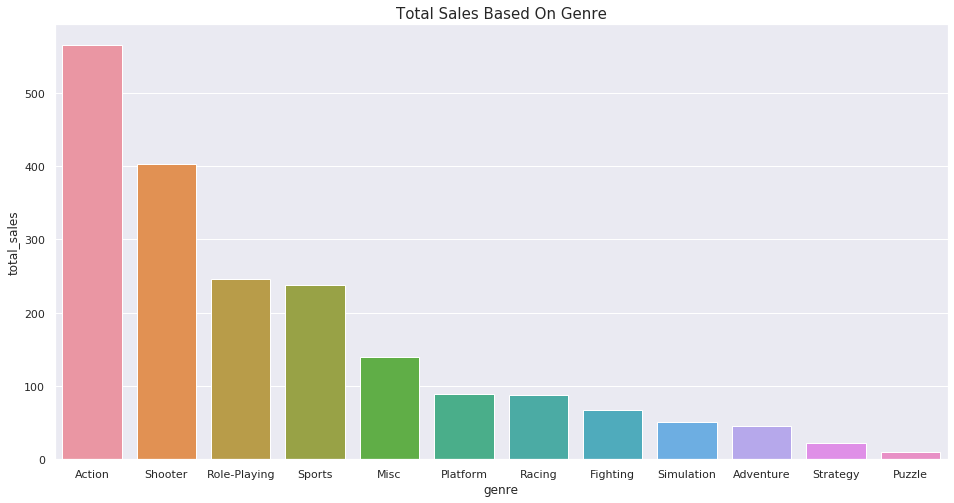

In [38]:
plt.figure(figsize=(16,8))
plt.title('Total Sales Based On Genre',fontsize=15)
sns.barplot(data=game_genre, x='genre', y='total_sales')
plt.xlabel('genre')
plt.ylabel('total_sales')
plt.show()

> As we can see, action dominates the total sales with shooter coming in close to second.We can conclude that action games are the most profitable as well as popular. In general, more active games like action and shooter games have higher sales while strategy and puzzle have the lowest sales.

### Conclusion


> - In this section, we look at how many games were released per year and we confirmed that companies did not release a lot games until the 2000s. Companies released the highest volume of games between 2007 and 2012
> - We look at how sales varied from platform to platform and we confirmed that PS2 and X360 had the top 2 sales
> - We then looked at the top platforms that had the highest sales and build a map to see the platform's sales throughout its lifespan
> - We concluded that when company release a newer console, the sales dropped for the older console (ex: PS, PS2,PS3)
> - We decided that we should take at least 6 years worth of data for our analysis to build a prognosis for 2017
> - Then, we looked at the platforms with the highest sales based on our new data. PS3 had the most sales
> - We looked at how professonal review affect the sales. There was a weak correlation between professional reviews and total sales
> - We then looked at sales comparison based on the platform with the same games. Playstation had a slight edge on some  games
> - Lastly, we looked at genre. We concluded that action is the most profitable and puzzle is the least profitable

## Step 4. User profile for each region

#### Top platforms per region

In [39]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(new_df.pivot_table(index='platform',values=region,aggfunc='sum')\
            .sort_values(by=region,ascending=False).head())


,na_sales
platform,
X360,228.18
PS3,168.96
PS4,108.74
XOne,93.12
3DS,82.83


,eu_sales
platform,
PS3,164.15
PS4,141.09
X360,117.87
3DS,61.46
PC,57.38


,jp_sales
platform,
3DS,100.62
PS3,49.40
PSP,24.28
PSV,21.84
PS4,15.96


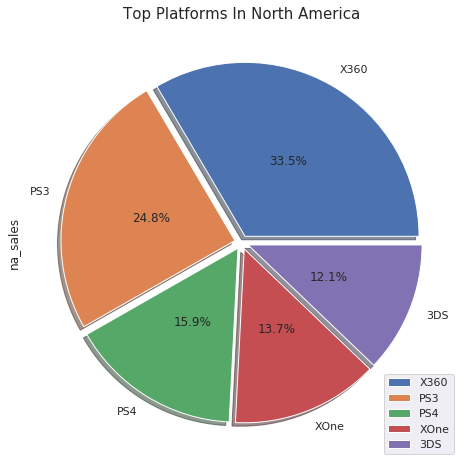

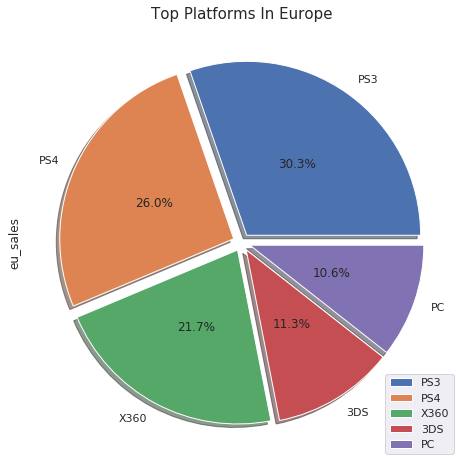

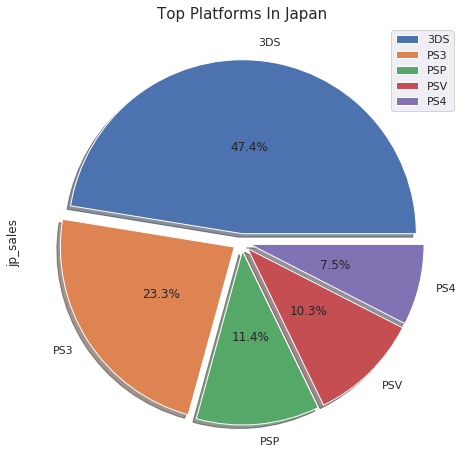

In [40]:
new_df_regions = new_df.groupby(['platform'])['na_sales'].sum().reset_index()\
                .sort_values(by='na_sales', ascending = False)
popular_platforms = new_df_regions.head()
(popular_platforms.set_index('platform').plot(y='na_sales', kind='pie',figsize=(8,8),\
                                              autopct='%1.1f%%',explode=[0.04]*5,pctdistance=0.5, shadow=True)
)
plt.title('Top Platforms In North America',fontsize=15)


new_df_regions = new_df.groupby(['platform'])['eu_sales'].sum().reset_index()\
                .sort_values(by='eu_sales', ascending = False)
popular_platforms = new_df_regions.head()
(popular_platforms.set_index('platform').plot(y='eu_sales', kind='pie',figsize=(8,8),\
                                              autopct='%1.1f%%',explode=[0.05]*5,pctdistance=0.5, shadow=True))
plt.title('Top Platforms In Europe',fontsize=15)


new_df_regions = new_df.groupby(['platform'])['jp_sales'].sum().reset_index()\
                .sort_values(by='jp_sales', ascending = False)
popular_platforms = new_df_regions.head()
(popular_platforms.set_index('platform').plot(y='jp_sales', kind='pie',figsize=(8,8),\
                                              autopct='%1.1f%%',explode=[0.05]*5,pctdistance=0.5, shadow=True))
plt.title('Top Platforms In Japan',fontsize=15)
plt.show()


> -  X360 is the top platform for North America
> - PS3 is the top platform for Europe
> - 3DS is the top platform for Japan
> - Each regions have different platforms that dominate the market. 3DS leads almost half of the sales of the console market in Japan

#### Top genres per region

In [41]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(new_df.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())


,na_sales
genre,
Action,234.41
Shooter,194.45
Sports,108.70
Role-Playing,83.78
Misc,69.81


,eu_sales
genre,
Action,202.17
Shooter,148.05
Sports,88.67
Role-Playing,62.30
Racing,40.58


,jp_sales
genre,
Role-Playing,79.87
Action,63.63
Misc,17.85
Fighting,12.38
Platform,12.13


In [42]:
#checking which platform has the most role-playing games
new_df[new_df['genre']=='Role-Playing'].groupby('platform')['genre'].count()

platform
3DS     87
DS      11
PC      40
PS3     76
PS4     51
PSP     62
PSV     85
Wii      9
WiiU     7
X360    23
XOne    14
Name: genre, dtype: int64

> - Action is both the top genre in North America and Europe 
> - Role-playing is the top genre in Japan, with action coming in second
> - North America and Europe have pretty much similar genre preference as it has the same rankings 1-4 except the fifth spot
> - After checking which platform has the most role-playing games, we can see that 3DS has the most role-playing games which makes sense because it is the top platform in Japan


#### ESRB ratings per region

In [43]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    display(new_df.pivot_table(index='rating',values=region,aggfunc='sum')\
            .sort_values(by=region,ascending=False).head())

,na_sales
rating,
M,329.66
E,211.09
T,172.47
E10+,119.95
EC,0.42


,eu_sales
rating,
M,268.95
E,195.14
T,129.28
E10+,79.88
RP,0.03


,jp_sales
rating,
T,134.34
E,73.01
M,27.33
E10+,11.23
EC,0.00


> - As we can see, the top rating for North America and Europe is ***M*** with ***E*** coming close to second 
> - Both North America and Europe have the same game rating rankings
> - ***T*** is the top rating for Japan, with ***E*** coming in second
> - ESRB ratings does affect sales in individual regions. It gives us an idea on what our target audience is in the gaming industry per region. We can plan our advertising campaigns accordingly.

> So to summarize each region:
> - North America - gamers prefer to play ***action*** games with an ***M*** rating on the ***X360*** platform
> - Europe - gamers prefer to play ***action*** games with an ***M*** rating on the ***PS3*** platform
> - Japan - gamers prefer to play ***role-playing*** games with a ***T*** rating on the ***3DS*** platform

# #  Step 5. Hypotheses Testing

#### Average user ratings of Xbox One and PC platforms are the same

$H_{0}$-Null Hypothesis: Average user ratings of the "XOne" and "PC" platforms are the same

$H_{1}$ - Alternative Hypotheis: Average user ratings of the "XOne" and "PC" platforms are different

In [44]:
#getting the samples
sample_x = new_df[new_df['platform'] == "XOne"]['user_score']
sample_p = new_df[new_df['platform'] == "PC"]['user_score']

sample_x.mean(), sample_p.mean()

(6.778947368421053, 6.680303030303031)

In [45]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_x, sample_p, equal_var=False)

print('p-value: ', results.pvalue)


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.3689095074328791
We can't reject the null hypothesis


> We calculated the mean  for user rating for both the Xbox and PC. We can see that the mean is pretty much the same but instead of basing our comparison on the mean alone, we use the data to perform a statistical test. We stated the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same. The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are different. We used a significance level of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. 
Based on the result, there is no statistically significant difference between the average user ratings of the Xbox One and PC platforms, therefore they are the same.
 


#### Average user ratings for the action and sport genres are the different

$H_{0}$- Null Hypothesis: Average user ratings of the action and sport platforms are the same

$H_{1}$- Alternative Hypothesis: Average user ratings of the action and sport platforms are different

In [46]:
#getting the samples
sample_a = new_df[new_df['genre'] == 'Action']['user_score']
sample_s = new_df[new_df['genre'] == 'Sports']['user_score']

sample_a.mean(), sample_s.mean()

(7.124397824397823, 6.333589743589744)

In [47]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_a, sample_s, equal_var=False)

print('p-value: ', results.pvalue)


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  2.109616274131074e-18
We reject the null hypothesis


>  We calculated the mean for user rating for both action and sports genre. We stated the null hypothesis that the average for both genres are the same. The alternative hypothesis is that the average user ratings for action and spport genre are different. We  set the siginificance level at 0.05. Based on the results, the decision is to reject the null hypothesis. We can see the significant difference when we calculated the mean and this result just confirms it. The test suggests that there is a statistically significant difference between the average user ratings for the action and sports genres, therefore they are different. 

## Step 6. Overall Conclusion

At first glance,there are a lot of missing values in Name,Year_of_Release,Critic_Score,Genre, User_Score and Rating column. We filled the missing values on a case by case basis We also noticed that several columns have incorrect data types. We converted these columns to their right data types. User_score column had 'tbd'values that switched to NaN to make filling in missing values easier.

In analyzing our data, we can conclude that:
> - Companies did not release a lot games until the 2000s. Companies released the highest volume of games between 2007 and 2012
> - We looked at how sales varied from platform to platform and we confirmed that PS2 and X360 had the top 2 sales
> - When company release a newer console, the sales dropped for the older console (ex: PS, PS2,PS3)
> - We need at least 6 years worth of data for our analysis to build a prognosis for 2017
> - PS3 had the most sales, based on our  data
> - There was a weak correlation between professional reviews and total sales
> - There was no correlation between user ratings and total sales
> - Playstation platforms(PS3 & PS4) had a slight edge on some  games when we looked at sales comparison based on the platofrm with the same games
> - Action is the most profitable genre and puzzle is the least profitable genre

In analyzing based on sales per region, we can conclude that:
> - The top rating for North America and Europe is ***M*** with ***E*** coming close to second 
> - Both North America and Europe have the same game rating rankings
> - ***T*** is the top rating for Japan, with ***E*** coming in second
> - ESRB ratings does affect sales in individual regions. It gives us an idea on the preference and the age of our target audience is in the gaming industry per region. We can plan our advertising campaigns accordingly.
> So to summarize each region:
> - North America - gamers prefer to play ***action*** games with an ***M*** rating on the ***X360*** platform
> - Europe - gamers prefer to play ***action*** games with an ***M*** rating on the ***PS3*** platform
> - Japan - gamers prefer to play ***role-playing*** games with a ***T*** rating on the ***3DS*** platform

The final step is hypotheses testing. We tested two hypotheses:
> - Average user ratings of the Xbox One and PC platforms are the same
> - Average user ratings for the Action and Sports genres are different

We both use 0.05 significance level for the test. For the first test, we cannot reject the null hypothesis therefore the average user ratings for the Xbox One and PC platform are the same. For the second test, we reject the null hypothesis therefore the average user ratings for action and sports genre are different.


        

